#  Dimensionality Reduction with PCA

In [1]:
%matplotlib inline

# Ignore deprecated warning
import warnings
warnings.filterwarnings("ignore")

# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set font scale and style
plt.rcParams.update({'font.size': 15})

In [2]:
# Import custom class
%run -i '../src/helper/transfxn.py'

# Load data

In [3]:
# Load cleaned data
df = pd.read_csv('../data/feat_engr_data.csv') 
print('Data size',df.shape)
df.head()

Data size (3817613, 48)


,c_year,c_mnth,c_wday,c_hour,class,c_vehs,c_conf,c_rcfg,c_wthr,c_rsur,...,psn_ct,avg_rsur_per_day,avg_raln_per_day,avg_psn_per_day,isev_ct,vtype_ct,traf_ct,avg_isev_per_day,avg_vtype_per_day,avg_traf_per_day
0,1999,January,Monday,9.0,0,2.0,Right turn,At an intersection,Clear and sunny,"Dry, normal",...,2584453,5.180113,5.924083,5.134903,2151965,3449952,1184092,4.275617,6.854513,2.352605
1,1999,January,Monday,9.0,0,2.0,Right turn,At an intersection,Clear and sunny,"Dry, normal",...,2584453,5.180113,5.924083,5.134903,1641640,3449952,1184092,3.261681,6.854513,2.352605
2,1999,January,Monday,20.0,0,1.0,Ran off left shoulder,Intersection with parking lot entrance,Clear and sunny,"Dry, normal",...,2584453,5.180113,0.484907,5.134903,2151965,3449952,2231,4.275617,6.854513,0.004433
3,1999,January,Monday,5.0,0,2.0,Hit a moving object,At an intersection,Raining,Wet,...,2584453,1.500935,0.287296,5.134903,1641640,112276,2048382,3.261681,0.223075,4.069814
4,1999,January,Monday,5.0,0,2.0,Hit a moving object,At an intersection,Raining,Wet,...,687278,1.500935,0.287296,1.365514,1641640,112276,2048382,3.261681,0.223075,4.069814


In [4]:
# Shuffle data
df = df.sample(frac = 1).reset_index(drop = True)

# Create feature matrix & class label

In [19]:
cols = ['c_year', 'c_mnth', 'c_wday', 'c_hour', 
       'v_year',  'p_sex', 'p_age', 'p_isev',
        'avg_day_per_mnth', 'avg_mnth_per_year', 
       'avg_hr_per_day', 'avg_wthr_per_day', 'avg_conf_per_day',
       'avg_rcfg_per_day',  'avg_rsur_per_day',
       'avg_raln_per_day', 'avg_psn_per_day',
       'avg_isev_per_day', 'avg_vtype_per_day', 'avg_traf_per_day']

In [20]:
# Feature matrix and class variable
X, y = df[cols], df['class']

In [21]:
# Relabel the class variable
y = y.map({0:'Non-fatal', 1: 'Fatal'})

# Transformation pipeline

In [22]:
# Instantiate the class
transfxn = TransformationPipeline()

In [23]:
# Transform and scale data
X_scaled, _,_ = transfxn.preprocessing(X, X)

In [24]:
print('Data size after pre-processing:', X_scaled.shape)

Data size after pre-processing: (3817613, 40)


# PCA plot

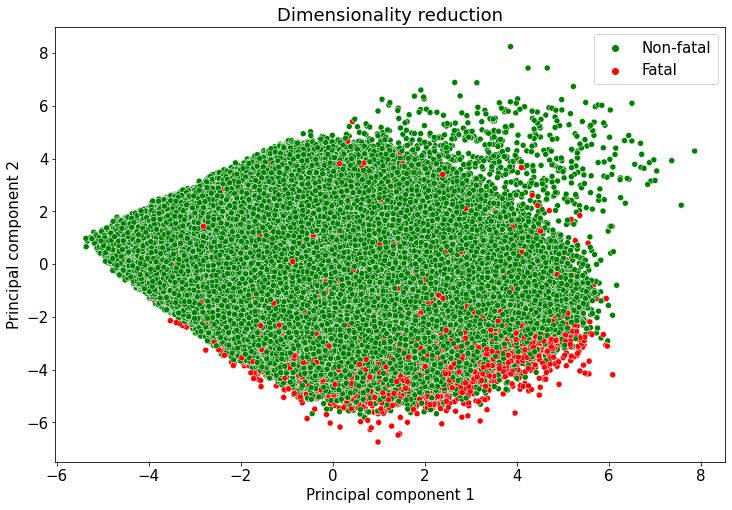

In [25]:
transfxn.pca_plot_labeled(X_scaled, y, palette = ['g', 'r'])